In [2]:
import torch

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

num_classes = 4
num_features = 2
random_seed = 42

# create multiclass data

X_blob, y_blob = make_blobs(n_samples= 1000, n_features=num_features, centers=num_classes, cluster_std=1.5, random_state = random_seed)

In [3]:
X_blob = torch.from_numpy(X_blob).type(torch.float)

In [4]:
y_blob = torch.from_numpy(y_blob).type(torch.float)

In [5]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2,random_state = random_seed)

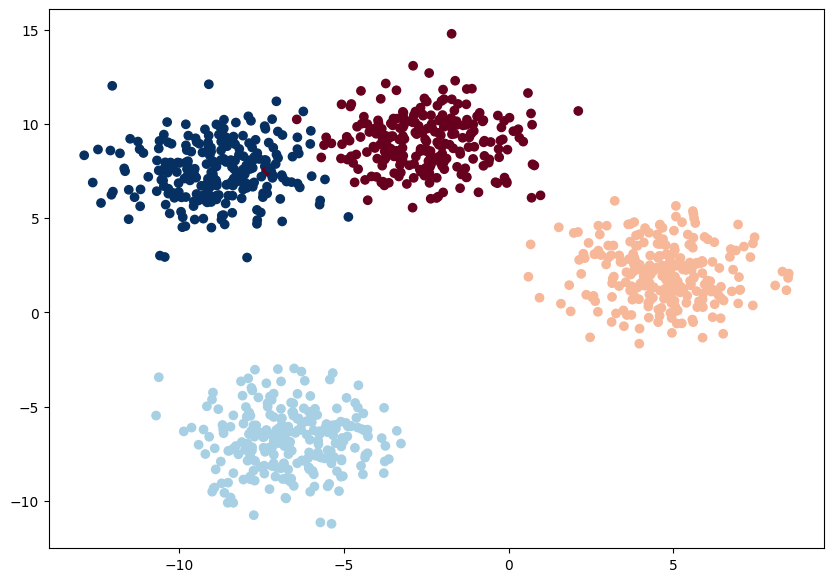

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1], c=y_blob, cmap = plt.cm.RdBu)

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [8]:
device

'cpu'

In [35]:
from torch import nn

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(2, 4).to(device)

In [36]:
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [37]:
X_blob_train.shape

torch.Size([800, 2])

In [38]:
y_blob_train.shape

torch.Size([800])

In [39]:
loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_4.parameters(), lr=0.01)

In [40]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

In [41]:
# calculate accuracy - out of 100 exmples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100

  return acc

In [42]:
torch.manual_seed(42)

epochs = 100

X_blob_train, X_blob_test, y_blob_train, y_blob_test = X_blob_train.to(device), X_blob_test.to(device), y_blob_train.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)

  y_pred_probs = torch.softmax(y_logits, dim =1)

  y_pred_probs = torch.argmax(y_pred_probs, dim=1)

  loss = loss_fn(y_logits, y_blob_train.type(torch.LongTensor))
  accuracy = accuracy_fn(y_blob_train, y_pred_probs)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)

    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test.type(torch.LongTensor))

    test_acc = accuracy_fn(y_blob_test, test_preds)

  if epoch % 10 == 0:
    print(f"epoch: {epoch} ||  loss: {loss} acc: {accuracy} || test loss: {test_loss} test acc: {test_acc}")



epoch: 0 ||  loss: 1.0432370901107788 acc: 65.5 || test loss: 0.963351309299469 test acc: 71.0
epoch: 10 ||  loss: 0.6368808746337891 acc: 79.5 || test loss: 0.6122152209281921 test acc: 88.0
epoch: 20 ||  loss: 0.4694470465183258 acc: 97.75 || test loss: 0.45864737033843994 test acc: 98.0
epoch: 30 ||  loss: 0.37339234352111816 acc: 98.5 || test loss: 0.3677147924900055 test acc: 99.0
epoch: 40 ||  loss: 0.31008732318878174 acc: 98.625 || test loss: 0.3065946102142334 test acc: 99.0
epoch: 50 ||  loss: 0.26485675573349 acc: 98.875 || test loss: 0.2622745633125305 test acc: 99.0
epoch: 60 ||  loss: 0.23081865906715393 acc: 98.875 || test loss: 0.2285250425338745 test acc: 99.5
epoch: 70 ||  loss: 0.20428618788719177 acc: 99.125 || test loss: 0.20196585357189178 test acc: 99.5
epoch: 80 ||  loss: 0.18307241797447205 acc: 99.125 || test loss: 0.18056653439998627 test acc: 99.0
epoch: 90 ||  loss: 0.16577735543251038 acc: 99.125 || test loss: 0.1630103439092636 test acc: 99.0


In [43]:
url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"

import requests
from pathlib import Path

request = requests.get(url)
with open("helper_functions.py","wb") as f:
  f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

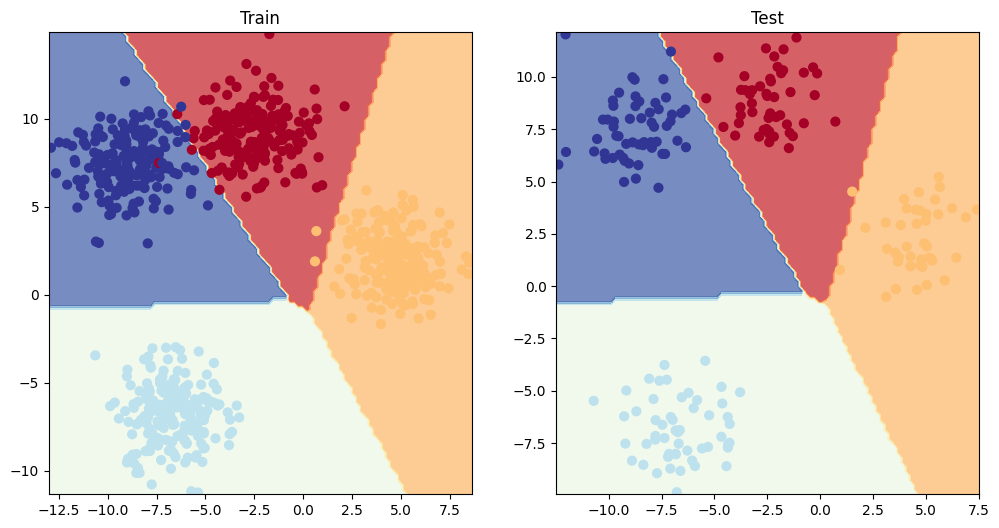

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")

plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1,2,2)

plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [46]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 851.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [48]:
from torchmetrics import Accuracy

In [55]:
torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

torchmetric_accuracy(y_pred_probs, y_blob_train)

tensor(0.9912)